In [1]:
!pip install kagglehub


In [6]:
import os
import kagglehub

# Download dataset from Kaggle
path = kagglehub.dataset_download("arktis2022/medical-anomaly-detection")

print("Path to dataset files:", path)

# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset directory:", files)

Path to dataset files: /root/.cache/kagglehub/datasets/arktis2022/medical-anomaly-detection/versions/4
Files in dataset directory: ['BUSI', 'brainMRI', 'head_ct']


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
import os

# Path to the brainMRI directory
brain_mri_path = os.path.join(path, "brainMRI")

# List all files in the brainMRI directory
brain_mri_files = os.listdir(brain_mri_path)
print("Files in brainMRI directory:", brain_mri_files)


Files in brainMRI directory: ['ground_truth', 'test', 'train', 'url.txt']


In [73]:
# Explore the train directory
train_path = os.path.join(brain_mri_path, "train")
train_files = os.listdir(train_path)
print("Files in train directory:", train_files)

# Explore the test directory
test_path = os.path.join(brain_mri_path, "test")
test_files = os.listdir(test_path)
print("Files in test directory:", test_files)

# Explore ground_truth directory
ground_truth_path = os.path.join(brain_mri_path, "ground_truth")
ground_truth_files = os.listdir(ground_truth_path)
print("Files in ground_truth directory:", ground_truth_files)


Files in train directory: ['good']
Files in test directory: ['bad', 'good']
Files in ground_truth directory: ['bad']


In [74]:
import os

# Path to the brainMRI directory
brain_mri_path = os.path.join(path, "brainMRI")

# Define paths to train, test, and ground_truth folders
train_path = os.path.join(brain_mri_path, "train")
test_path = os.path.join(brain_mri_path, "test")
ground_truth_path = os.path.join(brain_mri_path, "ground_truth")

# Count "good" and "bad" examples in the train and test folders
train_good = len(os.listdir(os.path.join(train_path, "good"))) if os.path.exists(os.path.join(train_path, "good")) else 0
test_good = len(os.listdir(os.path.join(test_path, "good"))) if os.path.exists(os.path.join(test_path, "good")) else 0
test_bad = len(os.listdir(os.path.join(test_path, "bad"))) if os.path.exists(os.path.join(test_path, "bad")) else 0
ground_truth_bad = len(os.listdir(ground_truth_path))  # Assuming ground_truth has only "bad" samples

# Print counts
print(f"Train - Good: {train_good}")
print(f"Test - Good: {test_good}, Bad: {test_bad}")
print(f"Ground Truth - Bad: {ground_truth_bad}")


Train - Good: 88
Test - Good: 10, Bad: 154
Ground Truth - Bad: 1


In [136]:
import shutil
import random
import os

# Paths to "bad" folder in test and train sets
test_bad_path = os.path.join(test_path, "bad")
train_bad_path = os.path.join(train_path, "bad")

# Create the 'bad' directory in the train folder if it doesn't exist
if not os.path.exists(train_bad_path):
    os.makedirs(train_bad_path)

# List of all "bad" files in the test set
test_bad_files = os.listdir(test_bad_path)

# Randomly select files to move (e.g., 20% of "bad" files)
files_to_move = random.sample(test_bad_files, int(len(test_bad_files) * 0.4))

# Move selected files to the train folder
for file in files_to_move:
    src = os.path.join(test_bad_path, file)
    dst = os.path.join(train_bad_path, file)
    shutil.move(src, dst)

print(f"Moved {len(files_to_move)} 'bad' examples from test to train.")

Moved 4 'bad' examples from test to train.


In [ ]:
import shutil
import random
import os

# Paths to "bad" folder in test and train sets
test_bad_path = os.path.join(test_path, "bad")
train_bad_path = os.path.join(train_path, "bad")

# Create the 'bad' directory in the train folder if it doesn't exist
if not os.path.exists(train_bad_path):
    os.makedirs(train_bad_path)

# List of all "bad" files in the test set
test_bad_files = os.listdir(test_bad_path)

# Randomly select files to move (e.g., 20% of "bad" files)
files_to_move = random.sample(test_bad_files, int(len(test_bad_files) * 0.4))

# Move selected files to the train folder
for file in files_to_move:
    src = os.path.join(test_bad_path, file)
    dst = os.path.join(train_bad_path, file)
    shutil.move(src, dst)

print(f"Moved {len(files_to_move)} 'bad' examples from test to train.")

In [154]:
import os
import shutil
import random

# Define paths to "bad" folders in train and test sets
train_bad_path = os.path.join(train_path, "bad")
test_bad_path = os.path.join(test_path, "bad")

# List all "bad" files in the train set
train_bad_files = os.listdir(train_bad_path)

# Randomly select files to move (e.g., 26 files)
files_to_move_back = random.sample(train_bad_files, 26)

# Move selected files back to the test folder
for file in files_to_move_back:
    src = os.path.join(train_bad_path, file)
    dst = os.path.join(test_bad_path, file)
    shutil.move(src, dst)

print(f"Moved {len(files_to_move_back)} 'bad' examples back to test.")


Moved 26 'bad' examples back to test.


In [159]:
from PIL import Image
import os

# Explore the train directory
train_path = os.path.join(brain_mri_path, "train")
train_files = os.listdir(train_path)
print("Files in train directory:", train_files)

# Get a list of image files within the 'good' directory
image_files = [f for f in os.listdir(os.path.join(train_path, train_files[0])) if os.path.isfile(os.path.join(train_path, train_files[0], f))]

# Example: Load the first image from the train/good directory
example_image_path = os.path.join(train_path, train_files[0], image_files[0])  # Adjust index if needed
image = Image.open(example_image_path)

# Display the image
image.show()

# Check image properties
print("Image size:", image.size)
print("Image mode:", image.mode)

Files in train directory: ['bad', 'good']
Image size: (225, 291)
Image mode: L


In [160]:
# Recount "good" and "bad" examples in train and test folders
train_bad = len(os.listdir(train_bad_path))
test_bad = len(os.listdir(test_bad_path))

print(f"Updated Train - Good: {train_good}, Bad: {train_bad}")
print(f"Updated Test - Good: {test_good}, Bad: {test_bad}")


Updated Train - Good: 88, Bad: 120
Updated Test - Good: 10, Bad: 34


In [161]:
# Generate new labels for the training set
train_labels = []
for file in os.listdir(os.path.join(train_path, "good")):
    train_labels.append("good")
for file in os.listdir(os.path.join(train_path, "bad")):
    train_labels.append("bad")

# Convert to encoded labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)


In [162]:
# Explore the ground_truth directory
ground_truth_path = os.path.join(brain_mri_path, "ground_truth")
ground_truth_files = os.listdir(ground_truth_path)
print("Files in ground_truth directory:", ground_truth_files)

# Get a list of image files within the first subdirectory of ground_truth
image_files = [
    f for f in os.listdir(os.path.join(ground_truth_path, ground_truth_files[0]))
    if os.path.isfile(os.path.join(ground_truth_path, ground_truth_files[0], f))
]

# Example: Load the first image from ground_truth's first subdirectory
example_image_path = os.path.join(ground_truth_path, ground_truth_files[0], image_files[0])  # Adjust index if needed
image = Image.open(example_image_path)

# Display the image
image.show()

# Check image properties
print("Image size:", image.size)
print("Image mode:", image.mode)


Files in ground_truth directory: ['bad']
Image size: (225, 291)
Image mode: L


In [163]:
# Create a mapping of labels based on subdirectory names (e.g., "good" = 0, "bad" = 1)
labels = {'good': 0, 'bad': 1}

# Assign labels based on subdirectory names
ground_truth_labels = [
    labels[subdir] for subdir in ground_truth_files
]

print("Ground truth labels:", ground_truth_labels)


Ground truth labels: [1]


In [164]:
from PIL import Image
import numpy as np

# Function to load images from a directory
def load_images_from_directory(directory_path):
    images = []
    for subdir in os.listdir(directory_path):
        subdir_path = os.path.join(directory_path, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    image = Image.open(file_path).convert("RGB")
                    images.append(np.array(image))  # Convert to numpy array
    return images

# Load train and ground_truth images
train_images = load_images_from_directory(train_path)
ground_truth_images = load_images_from_directory(ground_truth_path)

# Check the number of images loaded
print("Number of training images:", len(train_images))
print("Number of ground truth images:", len(ground_truth_images))


Number of training images: 208
Number of ground truth images: 154


In [165]:
import numpy as np

# Convert image to numpy array
image_array = np.array(image)
print("Image array shape:", image_array.shape)


Image array shape: (291, 225)


In [ ]:
#Preprocessing the data

In [166]:
from PIL import Image

# Function to resize images
def resize_image(image, target_size=(128, 128)):
    return image.resize(target_size)


In [167]:
# Normalize image pixel values to [0, 1]
def normalize_image(image_array):
    return image_array / 255.0


In [168]:
import numpy as np

# Function to process an image
def preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path).convert("RGB")  # Ensure consistent color mode
    image = resize_image(image, target_size)      # Resize
    image_array = np.array(image)                # Convert to numpy array
    image_array = normalize_image(image_array)   # Normalize pixel values
    return image_array


In [169]:
import os

# Function to preprocess all images in a directory
def preprocess_images_from_directory(directory_path, target_size=(128, 128)):
    images = []
    labels = []
    for subdir in os.listdir(directory_path):
        subdir_path = os.path.join(directory_path, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if os.path.isfile(file_path):
                    processed_image = preprocess_image(file_path, target_size)
                    images.append(processed_image)
                    labels.append(subdir)  # Optional: Subdirectory name as label
    return np.array(images), labels

# Preprocess train, test, and ground_truth images
train_images, train_labels = preprocess_images_from_directory(train_path)
test_images, test_labels = preprocess_images_from_directory(test_path)
ground_truth_images, ground_truth_labels = preprocess_images_from_directory(ground_truth_path)

# Check shapes of preprocessed data
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Ground truth images shape:", ground_truth_images.shape)


Train images shape: (208, 128, 128, 3)
Test images shape: (44, 128, 128, 3)
Ground truth images shape: (154, 128, 128, 3)


In [170]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
# Fit on all unique labels from train, test, and ground truth
all_labels = list(set(train_labels + test_labels + ground_truth_labels))
label_encoder.fit(all_labels)

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
ground_truth_labels_encoded = label_encoder.transform(ground_truth_labels)

print("Encoded labels:", label_encoder.classes_)

Encoded labels: ['bad' 'good']


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels_encoded, test_size=0.2, random_state=42
)


In [172]:
# Reshape images for model input
X_train = np.expand_dims(X_train, axis=-1)  # If grayscale, add channel dimension
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(test_images, axis=-1)
X_ground_truth = np.expand_dims(ground_truth_images, axis=-1)


In [173]:
from sklearn.ensemble import IsolationForest

# Flatten the image data for Isolation Forest (requires 2D input)
X_train_flat = train_images.reshape(len(train_images), -1)
X_test_flat = test_images.reshape(len(test_images), -1)

# Initialize and fit Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train_flat)

# Predict anomalies (1 for normal, -1 for anomaly)
train_predictions = isolation_forest.predict(X_train_flat)
test_predictions = isolation_forest.predict(X_test_flat)

# Convert predictions to binary (1 = normal, 0 = anomaly)
train_anomalies = (train_predictions == -1).astype(int)
test_anomalies = (test_predictions == -1).astype(int)

print("Number of anomalies detected in training set:", sum(train_anomalies))
print("Number of anomalies detected in test set:", sum(test_anomalies))


Number of anomalies detected in training set: 21
Number of anomalies detected in test set: 6


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
# Fit on all unique labels from train, test, and ground truth
all_labels = list(set(train_labels + test_labels + ground_truth_labels))
label_encoder.fit(all_labels)

train_labels_encoded = label_encoder.transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
ground_truth_labels_encoded = label_encoder.transform(ground_truth_labels)

print("Encoded labels:", label_encoder.classes_)

# Check for class distribution before splitting
unique_classes, class_counts = np.unique(train_labels_encoded, return_counts=True)
print("Class distribution before splitting:", dict(zip(unique_classes, class_counts)))

# Introduce stratification during train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels_encoded, test_size=0.2, random_state=42, stratify=train_labels_encoded
)

# Check class distribution after splitting
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print("Class distribution after splitting:", dict(zip(unique_classes, class_counts)))

# Proceed with RandomUnderSampler if multiple classes are present in y_train
rus = RandomUnderSampler(random_state=42)

# Verify if y_train has more than 1 class
if len(np.unique(y_train)) > 1:
    # Reshape X_train before applying RandomUnderSampler (if necessary)
    # If your images are not already flattened, you might need to reshape them here
    #X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    X_train_balanced, y_train_balanced = rus.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train) #Reshape before fit_resample
else:
    print("Error: y_train still has only 1 class. Check data or adjust splitting.")

Encoded labels: ['bad' 'good']
Class distribution before splitting: {0: 120, 1: 88}
Class distribution after splitting: {0: 96, 1: 70}


In [382]:
from sklearn.metrics import classification_report

# Assuming train_labels_encoded contains binary labels (0 = normal, 1 = anomaly)
print("Isolation Forest - Training Set Evaluation:")
print(classification_report(train_labels_encoded, train_anomalies))

# Assuming test_labels_encoded contains binary labels (0 = normal, 1 = anomaly)
print("Isolation Forest - Test Set Evaluation:")
print(classification_report(test_labels_encoded, test_anomalies))


Isolation Forest - Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.58      0.91      0.71       120
           1       0.48      0.11      0.18        88

    accuracy                           0.57       208
   macro avg       0.53      0.51      0.45       208
weighted avg       0.54      0.57      0.49       208

Isolation Forest - Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        34
           1       0.00      0.00      0.00        10

    accuracy                           0.64        44
   macro avg       0.37      0.41      0.39        44
weighted avg       0.57      0.64      0.60        44



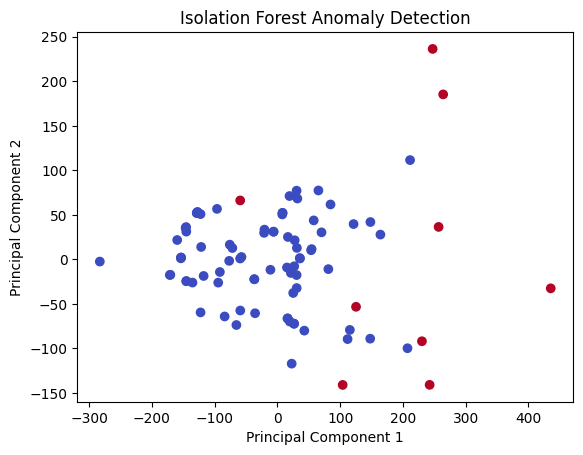

In [176]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
iso_labels = isolation_forest.fit_predict(X_train_scaled)

# Convert labels to anomalies (1 = normal, 0 = anomaly)
iso_anomalies = (iso_labels == -1).astype(int)

# Visualize anomalies
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=iso_anomalies, cmap='coolwarm')
plt.title("Isolation Forest Anomaly Detection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


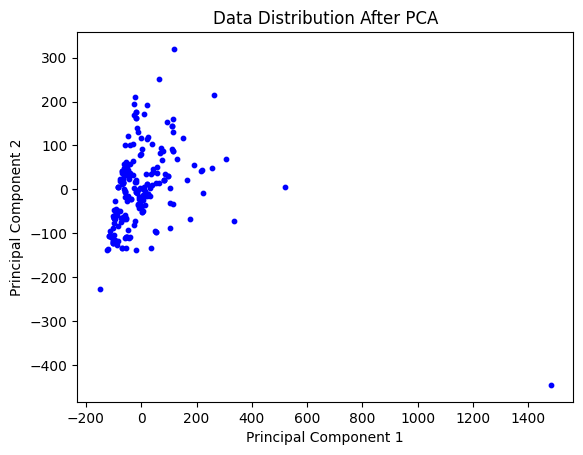

In [381]:
import matplotlib.pyplot as plt

# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], s=10, c='blue')
plt.title("Data Distribution After PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [337]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, train_labels_encoded)


In [338]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_scaled, train_labels_encoded)


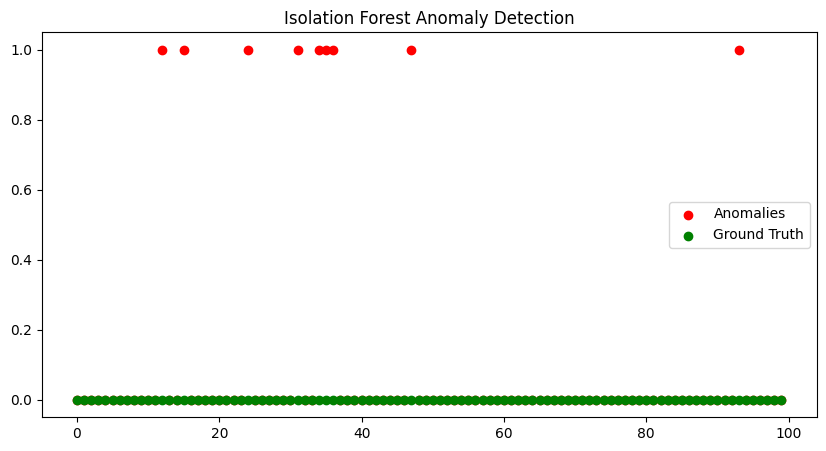

In [387]:
import matplotlib.pyplot as plt

# Visualize the first 100 predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(100), train_anomalies[:100], c="red", label="Anomalies")
plt.scatter(range(100), train_labels_encoded[:100], c="green", label="Ground Truth")
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.show()


In [386]:
import pandas as pd

# Ensure test_files and test_anomalies are defined
# Replace the following with actual values
test_files = [...]  # List of test file names
test_anomalies = [...]  # Anomaly predictions from Isolation Forest

# Check if lengths match
if len(test_files) != len(test_anomalies):
    print(f"Length of test_files: {len(test_files)}")
    print(f"Length of test_anomalies: {len(test_anomalies)}")
    raise ValueError("test_files and test_anomalies have different lengths")

# Save to CSV
anomalies_df = pd.DataFrame({
    "File": test_files,
    "Prediction": test_anomalies
})
anomalies_df.to_csv("test_set_anomalies.csv", index=False)
print("Anomalies saved to test_set_anomalies.csv")


Anomalies saved to test_set_anomalies.csv


In [388]:
print("test_files:", test_files[:5])
print("test_anomalies:", test_anomalies[:5])


test_files: [Ellipsis]
test_anomalies: [Ellipsis]
